# TD1: Least squares regression

(adapted from Pierre Gaillard)

In [3]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

## 1. Linear and polynomial least squares regression: curve fitting

Let $(X,Y)$ be a pair of real random variable such that $X$ is uniform on $[0,1]$ and $Y = f_*(X)+\sigma Z$, where $f_*(x) = \sin(6x)$, $\sigma = 0.5$, and $Z$ is some is a standard Gaussian random variable, independent from $X$. 

(1) Generate $n = 40$ realizations $(x_i, y_i), i = 1, \dots n$ of $(X,Y)$.

In [48]:
n=40
sigma=0.5
x,y,xy,fx=[],[],[],[]
for i in range(n):
    xi=(np.random.uniform())
    Z=np.random.normal(0,sigma)
    yi=(np.sin(6*xi)+sigma*Z)
    fxi=yi-sigma*Z
    xy.append((xi,yi))
    x.append(xi)
    y.append(yi)
    fx.append(fxi)
print(xy)

[(0.47469224729942505, 0.5613258734455957), (0.3582560578699534, 0.7347256013307375), (0.21452729768763557, 0.9168322089230707), (0.3795118746556736, 0.8765720469268533), (0.8211056974491222, -0.801954231188734), (0.038421016878197656, 0.3589525275236276), (0.056089381322003806, 0.9040546145224629), (0.7643680362269214, -0.8963377848197278), (0.5097503999491848, -0.33890929045395657), (0.22275320501252993, 1.170458955148899), (0.19632898959472134, 1.3074013253444374), (0.977831496947902, -0.6796831658787337), (0.279154367134687, 1.1783579834417612), (0.7167847775160886, -1.29296513334646), (0.8359707118633682, -1.2918991996608253), (0.10226549534675622, 0.7550664562850176), (0.647466065965821, -0.7508907766483701), (0.7982732113268078, -1.098249130943014), (0.01815179476415063, 0.45523307477741004), (0.9736291699138495, -1.026323525531895), (0.4139916873090276, 0.18829310157741164), (0.7876074014451735, -0.8575473626009225), (0.8138948081441605, -1.155935690790078), (0.8840334597567193

(2) Plot the realizations of $(X,Y)$, along with the curve $y = f_*(x)$.

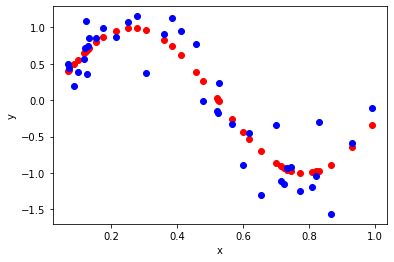

In [7]:
plt.plot(x,fx,"ro")
plt.plot(x,y,"bo")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In this section, we try to learn the function $f_*$ from the $n$ samples. We start with empirical risk minimization over the set of linear functions. 

(3) What are here the input space $\mathcal{X}$ of the linear regression? What is the output space $\mathcal{Y}$? What is the optimal predictor among all $L^2$ functions $f:\mathcal{X} \to \mathcal{Y}$? (Here optimal means that it minimizes the risk $R(f)$.) What is the risk of the optimal predictor?

The empirical risk minimization over the set of linear function means that we estimate
$$ \hat{f} = {\rm argmin}_{f \in F} \hat{R}(f) $$ 
where 
$$ F = \{f(x) = w_0 + w_1 x | w_0, w_1 \in \mathbb{R}\} \, , $$
$$ \hat{R}(f) = \frac{1}{n} \sum_{i=1}^{n} (y_i - f(x_i))^2 \, .$$

(4) Writing $\hat{f}(x) = w_1 x + w_0$, compute $w_0$, $w_1$ in terms of the observations $(x_i,y_i)$.

In [56]:
x=np.asarray(fx)
y=np.asarray(y)
#x=np.sin(6*x)
print(x)
print(y)
xt=x.transpose()
w1=np.matmul(xt,x)**(-1)
w1*=np.matmul(xt,y)
print("w1=",w1)
w0=y-w1*x
w0=np.std(w0)
print("w0=", w0)

[ 0.28924609  0.83715248  0.96004523  0.76078474 -0.97713715  0.22848974
  0.33021967 -0.99204976  0.08299468  0.97268241  0.92383234 -0.40428442
  0.99458338 -0.91644974 -0.95431566  0.57580873 -0.67665031 -0.99701768
  0.10869559 -0.427215    0.61125277 -0.99991215 -0.98541852 -0.82993131
 -0.88740356 -0.66202011  0.84554349 -0.94233928  0.99932526 -0.1343987
 -0.60437557 -0.89283483  0.18849962 -0.43663996 -0.76377675  0.96362876
 -0.64388325  0.79040092  0.32737096 -0.65800411]
[ 0.56132587  0.7347256   0.91683221  0.87657205 -0.80195423  0.35895253
  0.90405461 -0.89633778 -0.33890929  1.17045896  1.30740133 -0.67968317
  1.17835798 -1.29296513 -1.2918992   0.75506646 -0.75089078 -1.09824913
  0.45523307 -1.02632353  0.1882931  -0.85754736 -1.15593569 -0.51407388
 -1.00418468 -0.61452979  0.88507693 -1.38690922  0.90032274 -0.02812308
 -1.12632632 -0.84128588 -0.24058793 -0.15404964 -0.8879358   0.7171441
 -0.39420613  0.8444388   0.08038266 -0.38991375]
w1= 1.0658571176797929
w0=

(5) Using this formula, complete the previous plot with this estimator.

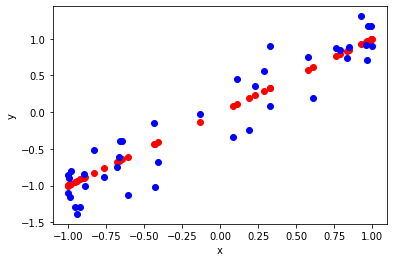

In [57]:
plt.plot(x,fx,"ro")
plt.plot(x,y,"bo")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

(6) Repeat the computation of the coefficients, using now the function `numpy.linalg.lstsq` . Check that the results are the same.

In [72]:
A = np.vstack([x, np.ones(len(x))]).T
#print(A)
w=np.linalg.lstsq(A,y)[0]
w1=w[0]
w0=w[1]
print("w1=",w1)
print("w0=",w0)

w1= 1.0627762522966293
w0= -0.01729647126923794


/Users/yiweizhang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


(7) Minimize the empirical risk over the set of polynomials of order 2. Plot the optimal polynomial.

(8) Generalize your code in order to compute the optimal polynomial of order $k$. Vary $k$ and the number of samples $n$, and plot the results. Comment.

(9) Let us denote $\hat{f}_k$ the minimizer of the empirical risk over the polynomials of order $k$. Plot the risk $R(\hat{f}_k)$ and the empirical risk $\hat{R}(\hat{f}_k)$ as a function of $k$, for $n=40$ and $n=400$. Comment.

## 2. Generalization performance

We now consider problems in higher dimension with the following data distribution: $w^*$ and $X$ are such that each $w^*_j$ and $x_{i,j}$ is independent and follow $\mathcal{N}(0,1/j^2)$ (centered normal with variance $1/j^2$). Then we have a linear model $Y= X^T w^* + Z$ where $Z\sim \mathcal{N}(0,\sigma^2)$ (for simplicity, we omit the intercept/bias and consider linear predictors instead of affine).

#### Ordinary least squares

In class, we have shown that the fixed design risk of the OLS estimator $R_X(\hat w)$ has an expectation of $\sigma^2d/n$ (where the expectation is with respect to the random draw of the training outputs $Y_i$). Here we will measure the true risk, with a random design, and see if the behavior is similar. 

(10) Fix $d=20$ and $\sigma = 0.5$ and plot the excess risk $R(\hat w) - R^*= \mathbb{E}_{X}[(X^T(\hat{w}-w^*)) | w^*] = \Vert \hat{w} - w^*\Vert_\Sigma^2$ as a function of $n$ for $n\geq d+1$, where $\Sigma = \mathbb{E}[XX^T] = \mathrm{diag}(1/j^2)$. Does it converge to $0$? At what rate? (you may need to average over several realizations of $\hat w$ to see a clear trend).

#### Ridge least-squares regression

(11) In the same setting, compute the ridge least-squares estimator with a regularization parameter $\lambda$. Plot the excess risk (as above) as a function of $\lambda$ for $\sigma =0.5$, $n=50$ and $d=20$ and $\lambda \in [0,10]$. Plot the same for $d=100$. Is the excess risk smaller than without regularization? At the best value for $\lambda$, is there an effect of increasing the dimension? 

It can be shown that with a proper choice of $\lambda$ (which is in $O(1/\sqrt{n})$) the (fixed design) excess risk of the ridge regression is in $O(1/\sqrt{n})$. Let us see if we observe a similar behavior with a random design.

(12) With $d=20$, plot the excess risk as a function of $n$ where for each value of $n$, the value of the regularization $\lambda$ is chosen in the set $\{ 2^{-2},2^{-1},2^0,2^1,2^2,2^3\}$ as the one with the smallest excess risk. Compare with the curve obtained with OLS in the same setting above. Note that in practice, we do not have access to the excess risk and $\lambda$ has to be chosen via cross-validation. 

##  3. (Optional) Linear and polynomial classification on the MNIST dataset

Download the MNIST dataset from the course website and save it into the folder of this notebook.

In [ ]:
data = sio.loadmat('mnist_digits.mat')

In [ ]:
data_x = data['x']
data_y = data['y']
print(data_x.shape)

In [ ]:
i = np.random.randint(len(data['x']))
plt.imshow(np.reshape(data_x[i],(28,28)), cmap='binary')
plt.show()

In [ ]:
data_y[i]

(13) Optional question: choose two digits and train a linear classifier that distinguishes the two digits. You may use linear least-squares regression, where $y_i \in \{-1,+1\}$ depends on the digit. Taking the sign of the learnt predictor then gives a classifier.

Make sure that you divide the dataset into training and test sets to be able to evaluate the performance of your algorithms. If your algorithm involves a regularization parameter, use a validation set (or cross-validation) to fix it.

Add noise to the images and repeat the experiments.